In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# read from .csv file
ds_salary_df = pd.read_csv('ds_salaries.csv')
ds_salary_df.head()
# all salaries are yearly (annual) in USD

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [39]:
# delete unnamed column
ds_salary_df_1 = ds_salary_df.drop(columns=['Unnamed: 0'])
ds_salary_df_1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [40]:
# check missing values
ds_salary_df_1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [41]:
# only select important columns
ds_salary_df_1 = ds_salary_df_1[['work_year', 'experience_level', 'employment_type', 'salary_in_usd', 'remote_ratio', 'company_size']]
ds_salary_df_1.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size
0,2020,MI,FT,79833,0,L
1,2020,SE,FT,260000,0,S
2,2020,SE,FT,109024,50,M
3,2020,MI,FT,20000,0,S
4,2020,SE,FT,150000,50,L


In [42]:
# clarify some abbreviations
stands_for = {"experience_level":{"EN":"entry", "MI":"mid","SE":"senior", "EX":"executive"}, "employment_type":{"FT":"full-time", "PT":"part-time", "CT":"contract", "FL":"flexible"}}
ds_salary_df_1 = ds_salary_df_1.replace(stands_for)
ds_salary_df_1.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size
0,2020,mid,full-time,79833,0,L
1,2020,senior,full-time,260000,0,S
2,2020,senior,full-time,109024,50,M
3,2020,mid,full-time,20000,0,S
4,2020,senior,full-time,150000,50,L


In [43]:
# save cleaned data as csv
ds_salary_df_1.to_csv('ds_salaries_clean.csv', index=False)

In [61]:
ds_salary_df_1['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [44]:
# average salary by work year
year_salary = ds_salary_df_1.groupby('work_year')['salary_in_usd'].mean()
year_salary

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64

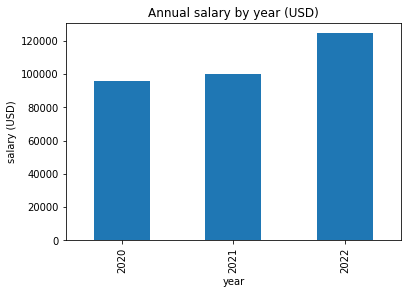

In [70]:
year_salary.plot(kind='bar')
plt.title('Annual salary by year (USD)')
plt.xlabel('year')
plt.ylabel('salary (USD)')
plt.show()

There is only a slight increase in average salary between 2020 and 2021, but a significant increase in that between 2021 and 2022.

In [46]:
# average salary by experience level
xp_salary = ds_salary_df_1.groupby('experience_level')['salary_in_usd'].mean()
xp_salary.sort_values()

experience_level
entry         61643.318182
mid           87996.056338
senior       138617.292857
executive    199392.038462
Name: salary_in_usd, dtype: float64

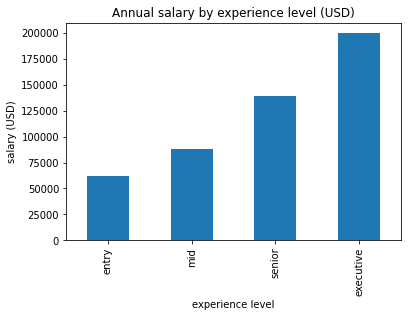

In [71]:
xp_salary.sort_values().plot(kind='bar')
plt.title('Annual salary by experience level (USD)')
plt.xlabel('experience level')
plt.ylabel('salary (USD)')
plt.show()

Entry level jobs in developed countries typically earn around 60000 dollars per year, which translate to around 5000 dollars per month or 75 million rupiahs per month.
Executive jobs earn almost 200000 dollars per year, which means around 16000 dollars per year or 240 million rupiahs per month.

In [50]:
# average salary by company size
size_salary = ds_salary_df_1.groupby('company_size')['salary_in_usd'].mean()
size_salary.sort_values()

company_size
S     77632.674699
M    116905.466258
L    119242.994949
Name: salary_in_usd, dtype: float64

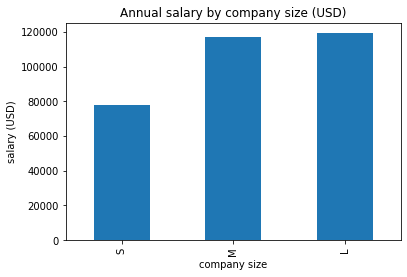

In [72]:
size_salary.sort_values().plot(kind='bar')
plt.title('Annual salary by company size (USD)')
plt.xlabel('company size')
plt.ylabel('salary (USD)')
plt.show()

As hypothesized, the larger then company, the salary will tend to be higher. However, there is no significant difference in salary between medium sized and large sized companies.

In [52]:
# average salary by employment type
type_salary = ds_salary_df_1.groupby('employment_type')['salary_in_usd'].mean()
type_salary

employment_type
contract     184575.000000
flexible      48000.000000
full-time    113468.073129
part-time     33070.500000
Name: salary_in_usd, dtype: float64

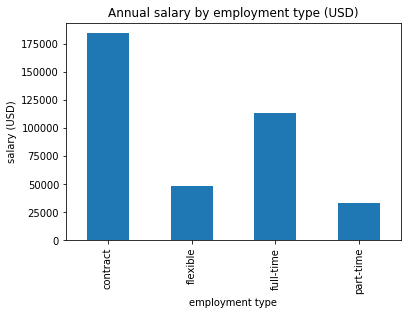

In [73]:
type_salary.plot(kind='bar')
plt.title('Annual salary by employment type (USD)')
plt.xlabel('employment type')
plt.ylabel('salary (USD)')
plt.show()

Contract and full-time employees receive statistically significant higher than part-time or flexible time employees. This is expected, since contract and full-time employees usually perform better than part-time or flexible time employees.

In [55]:
# average salary by ratio of WFA/WFO
wfa_salary = ds_salary_df_1.groupby('remote_ratio')['salary_in_usd'].mean()
wfa_salary

remote_ratio
0      106354.622047
50      80823.030303
100    122457.454068
Name: salary_in_usd, dtype: float64

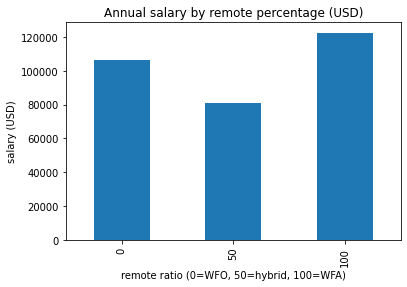

In [74]:
# 0 is full WFO, 50 is hybrid, 100 is full WFA
wfa_salary.plot(kind='bar')
plt.title('Annual salary by remote percentage (USD)')
plt.xlabel('remote ratio (0=WFO, 50=hybrid, 100=WFA)')
plt.ylabel('salary (USD)')
plt.show()

In general, hybrid workers typically earn lower salary than full WFA or full WFA. Full WFA workers typically earn higher than even WFO. This is probably due to full WFA workers rank are typically have high experience level, as indicated below.

In [57]:
ds_salary_df_1.groupby(['experience_level', 'remote_ratio']).size()

experience_level  remote_ratio
entry             0                14
                  50               25
                  100              49
executive         0                 3
                  50                5
                  100              18
mid               0                56
                  50               42
                  100             115
senior            0                54
                  50               27
                  100             199
dtype: int64

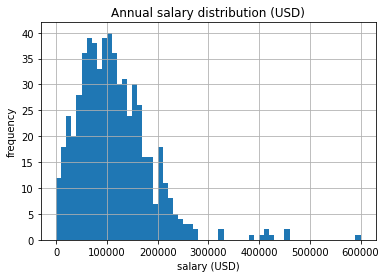

In [69]:
# overall salary histogram
import numpy as np

bins = np.arange(0, 610000, 10000) # maximum annual salary in the data is US$600000
ds_salary_df_1.hist(column=['salary_in_usd'], bins=bins)
plt.title('Annual salary distribution (USD)')
plt.xlabel('salary (USD)')
plt.ylabel('frequency')
plt.show()

There seems to be some upper outliers in this data, however this is actually normal, because there will be extremely rare cases of an employee earn very high salary.